<a href="https://colab.research.google.com/github/Manith-Ratnayake/UCI_machine_learning/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
pip install ucimlrepo

# **Dataset Preparation**

In [164]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

heart_disease_df = pd.concat([X,y], axis = 1)
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [165]:
heart_disease_df.shape

(303, 14)

In [166]:
print("No of rows", heart_disease_df.shape[0])
print("No of columns", heart_disease_df.shape[1])

No of rows 303
No of columns 14


In [167]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [168]:
heart_disease_df = heart_disease_df.dropna()

In [169]:
# Verify that there are no missing values left
print(heart_disease_df.isnull().sum().sum())

0


In [170]:
heart_disease_df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [171]:
heart_disease_df_duplicated = heart_disease_df.duplicated().any()
print(heart_disease_df_duplicated)

False


In [172]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


<Axes: >

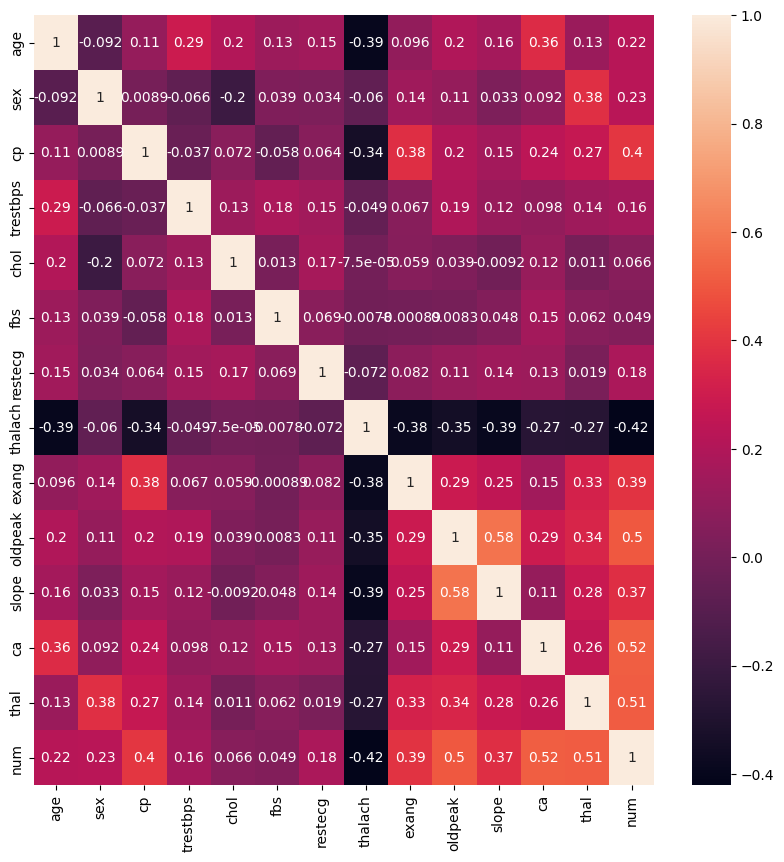

In [173]:
plt.figure(figsize = (10,10))
sns.heatmap(heart_disease_df.corr(), annot  = True)

In [174]:
heart_disease_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [175]:
heart_disease_df['num'].value_counts()

,count
num,
0,160
1,54
2,35
3,35
4,13


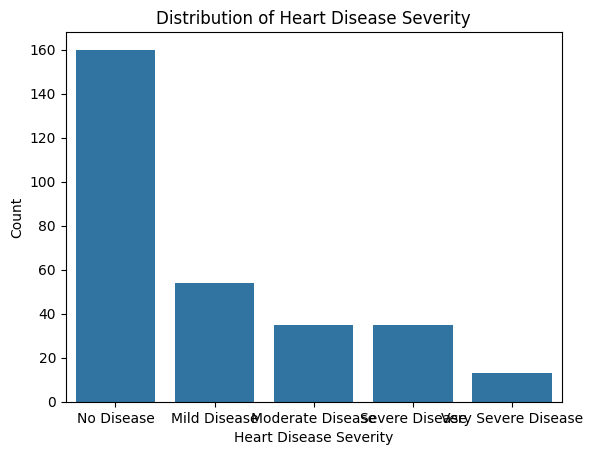

In [176]:
sns.countplot(x=heart_disease_df['num'])

plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[
    'No Disease',
    'Mild Disease',
    'Moderate Disease',
    'Severe Disease',
    'Very Severe Disease'
])

# Add axis labels and a title
plt.xlabel('Heart Disease Severity')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Severity')

# Show the plot
plt.show()

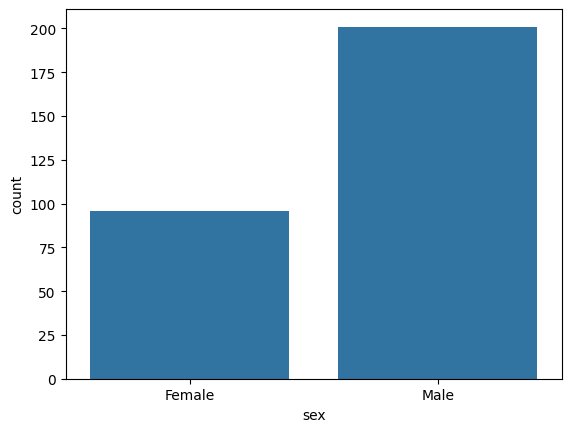

In [177]:
sns.countplot(x=heart_disease_df['sex'])

# Ensure x-axis has specific labels, if needed
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Show the plot
plt.show()

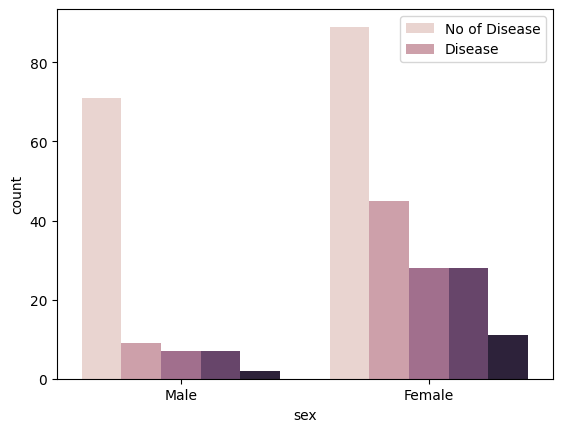

In [178]:
sns.countplot(x="sex", hue="num", data= heart_disease_df)
plt.xticks([0,1], ['Male','Female'])
plt.legend(labels=['No of Disease', 'Disease'])

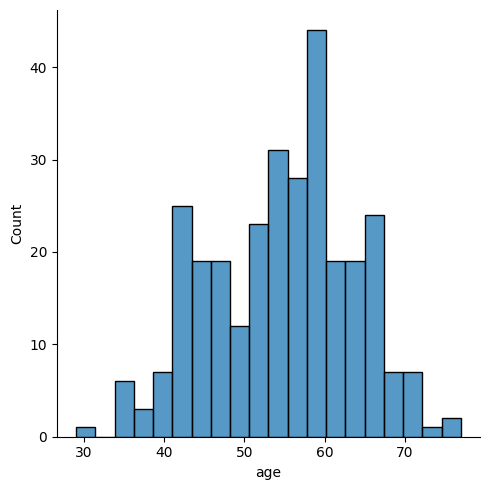

In [179]:
sns.displot(heart_disease_df['age'], bins=20)
plt.show()

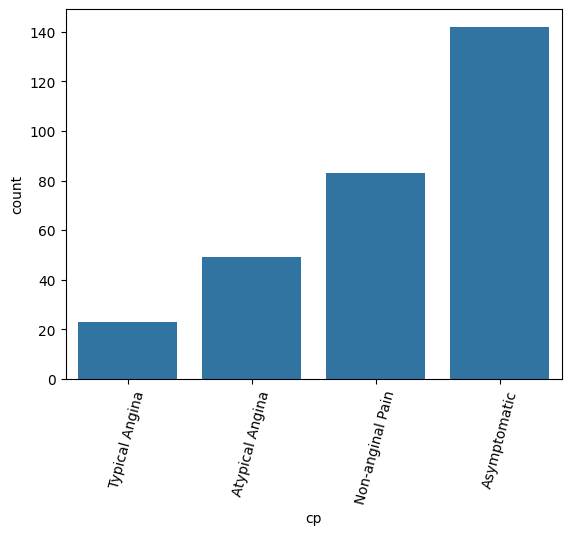

In [180]:
sns.countplot(x=heart_disease_df['cp'])

# Customize x-axis labels and rotate them
plt.xticks(ticks=[0, 1, 2, 3], labels=["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"], rotation=75)

# Show the plot
plt.show()

<Axes: xlabel='cp', ylabel='count'>

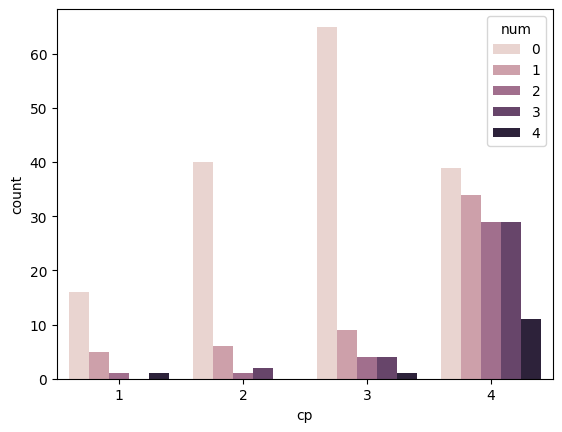

In [181]:
sns.countplot(x="cp",hue="num",data=heart_disease_df)

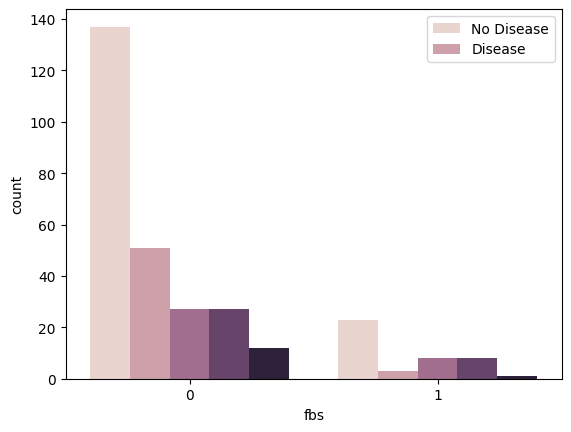

In [182]:
sns.countplot(x='fbs', hue='num',data=heart_disease_df)
plt.legend(labels=["No Disease","Disease"])
plt.show()

<Axes: >

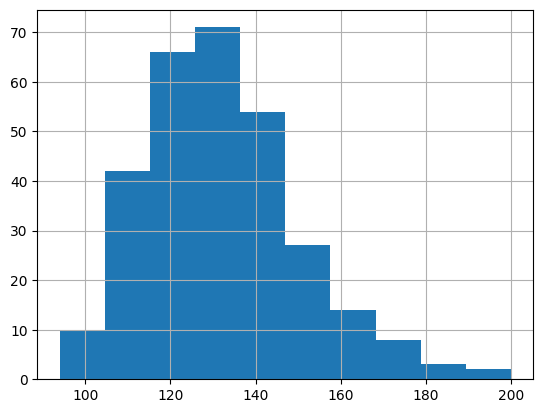

In [183]:
heart_disease_df['trestbps'].hist()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


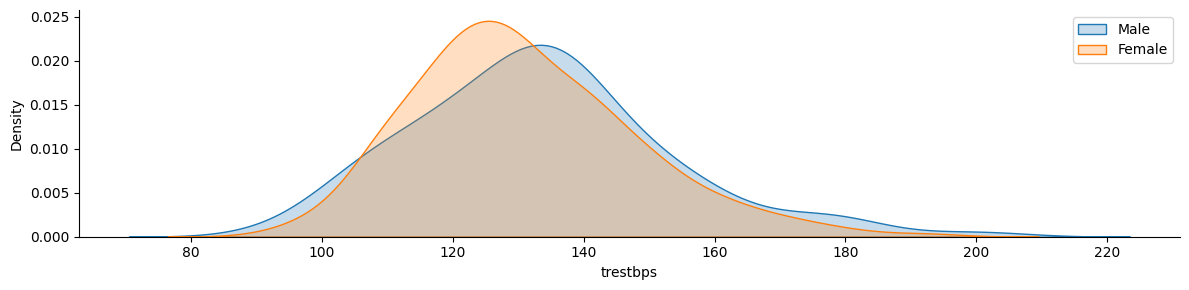

In [184]:
g = sns.FacetGrid(heart_disease_df, hue="sex", aspect = 4)
g.map(sns.kdeplot, 'trestbps',shade=True)
plt.legend(labels=["Male","Female"])

<Axes: >

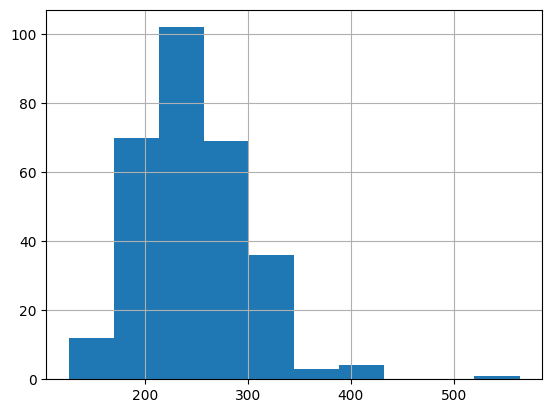

In [185]:
heart_disease_df['chol'].hist()

In [186]:
categorical_value = []
continouns_value = []

for column in heart_disease_df.columns:
  if heart_disease_df[column].nunique() <= 10:
    categorical_value.append(column)

  else:
    continouns_value.append(column)

print("categorical values are ", categorical_value)
print("continouns values are", continouns_value)

categorical values are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
continouns values are ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [187]:
categorical_value.remove('sex')
categorical_value.remove('num')
heart_disease_df = pd.get_dummies(heart_disease_df, columns=categorical_value,drop_first = True)

In [188]:
heart_disease_df.head()

,age,sex,trestbps,chol,thalach,oldpeak,num,cp_2,cp_3,cp_4,...,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63,1,145,233,150,2.3,0,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,67,1,160,286,108,1.5,2,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,67,1,120,229,129,2.6,1,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,37,1,130,250,187,3.5,0,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,41,0,130,204,172,1.4,0,True,False,False,...,False,True,False,False,False,False,False,False,False,False


# **Feature Scaling**

In [189]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
heart_disease_df[continouns_value] = ss.fit_transform(heart_disease_df[continouns_value])

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

In [ ]:
y_pred_Logistic = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_Logistic)
accuracy_score(y_test, y_pred_Logistic)

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)

In [ ]:
y_pred_SVM = svm.predict(X_test)
accuracy_score_SVM = (y_test, y_pred_SVM)

In [ ]:
from sklearn.neighbors import KNeigborsClassifier
knn = KNeigborsClassifier()
knn.fit(X_train, y_train)

In [ ]:
y_pred_knn = knn.predict(X_test)
accuracy_score_knn(y_test, y_pred_knn)

In [ ]:
from sklearn.tree import DesicionTreeClassifier
dt = DesicionTreeClassifier()
dt.fit(X_train,y_train)

In [ ]:
y_pred_dt = dt.predict(X_test)
accuracy_score_dt(y_test, y_pred_dt)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

In [ ]:
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

In [ ]:
y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)